In [1]:

arch_map = {'': 'Baseline',
            'AC': 'Adaptive Clipper',
            'MF': 'Median Filter',
            'ranger': 'Ranger',
            'SR': 'Swap ReLU6',
            'TMR': 'TMR'
 }

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/") if file_path.startswith("FSIM_W_HPC_resnet") and not file_path.endswith('gz')]
# print(log_folders)

general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
for layer_conf in log_folders:
    model = layer_conf.split('_')[3]
    architecture = ''
    if len(layer_conf.split('_')) == 5:
        architecture = layer_conf.split('_')[4]
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:
            # if not (architecture == 'SR' and cnf in ['lyr2_JOBID0_W', '']):

                file_path = os.path.join(folder_path, cnf)

                report_path = os.path.join(file_path, "fsim_full_report.csv")
                report = pd.read_csv(report_path)
                report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

                report.drop(columns=['Unnamed: 0'], inplace=True)
                report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                
                report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
                report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
                report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
                report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

                report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
                report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
                report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
                report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

                report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
                report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
                report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
                report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

                report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
                report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
                report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
                report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
                report['Architecture'] = arch_map[architecture]
                general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

                new_path = os.path.join(file_path, "Misclassified_images_report.csv")
                additional_report = pd.read_csv(new_path)
                additional_report['model'] = 'Resnet18'
                additional_report['Architecture'] = arch_map[architecture]
                additional_report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                new_report = pd.concat([new_report, additional_report], axis=0, ignore_index=True)
                new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"



In [3]:
general_report[general_report['Architecture'] == 'Baseline']

,layer,kernel,channel,row,col,bitmask,gold_ACC@1,gold_ACC@k,img_Top1_Crit,img_Top1_SDC,...,AbsF1Dk,MRRD,MRRDk,AbsrD,AbsRDk,MRPD,MRPDk,AbsPD,AbsPDk,Architecture
225524,20,0,193,NaN,NaN,2097152,85.0,100.0,9.0,89.0,...,0.191888,11.294666,0.000000,9.341884,0.000000,8.414320,0.792719,7.197583,0.174342,Baseline
225525,20,8,328,NaN,NaN,536870912,85.0,100.0,7.0,93.0,...,0.378409,8.574318,0.000000,7.091868,0.000000,6.261918,1.657806,5.356425,0.364600,Baseline
225526,20,8,312,NaN,NaN,1073741824,85.0,100.0,68.0,29.0,...,19.335051,80.582160,45.555562,66.649969,45.555568,77.907507,29.944633,66.641837,6.585702,Baseline
225527,20,8,505,NaN,NaN,4194304,85.0,100.0,8.0,90.0,...,0.287470,7.063033,0.000000,5.841875,0.000000,5.145027,1.297028,4.401040,0.285254,Baseline
225528,20,9,12,NaN,NaN,1073741824,85.0,100.0,73.0,23.0,...,22.593617,76.701645,47.638893,63.440372,47.638899,52.595745,58.675853,44.990236,12.904540,Baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298473,8,71,55,0.0,0.0,8388608,81.0,100.0,10.0,90.0,...,0.143710,3.965366,0.000000,3.178316,0.000000,5.844292,0.518748,4.790580,0.112295,Baseline
298474,8,85,72,2.0,0.0,1073741824,81.0,100.0,72.0,19.0,...,24.447515,89.155208,51.307699,71.459602,51.307705,97.710051,71.926917,80.093162,15.570267,Baseline
298475,8,42,100,2.0,0.0,16777216,81.0,100.0,9.0,91.0,...,0.202340,8.896029,0.000000,7.130337,0.000000,8.199131,0.913116,6.720847,0.197665,Baseline
298476,8,61,21,2.0,1.0,2097152,81.0,100.0,8.0,91.0,...,0.090957,3.618812,0.000000,2.900547,0.000000,2.055042,0.364466,1.684523,0.078897,Baseline


In [3]:
general_report[general_report['bit_faulty_pos']==30].groupby('Architecture')['fault_ACC@1'].mean()

Architecture
Adaptive Clipper    63.046831
Baseline            52.956183
Median Filter       64.472760
Ranger              65.517908
Swap ReLU6          38.514740
Name: fault_ACC@1, dtype: float64

## Fault distribution

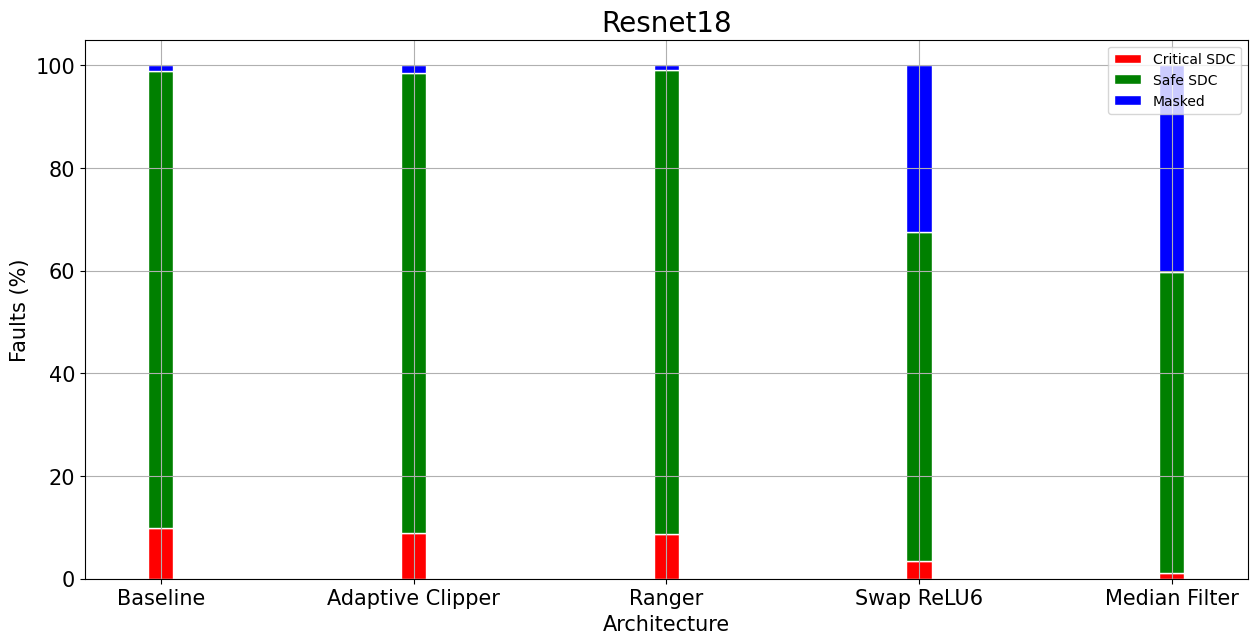

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,7))

general_report.rename(columns={'img_Top1_Crit': 'Critical SDC',
                       'img_Top1_SDC': 'Safe SDC',
                       'img_Top1_Masked': 'Masked'}, inplace=True)

grouped_fd = general_report[['Critical SDC', 'Safe SDC', 'Masked', 'Architecture']].groupby('Architecture').mean()
new_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
grouped_fd = grouped_fd.reindex(new_order)

grouped_fd.plot(kind='bar', stacked=True, color=['red', 'green', 'blue' ], edgecolor='white', width=0.1, ax = ax, legend=True, rot=0)
grouped_fd.to_csv('/home/bepi/Desktop/Ph.D_/projects/APP_FI/code/APP_Fault_injections/report_analysis/HardeningEvaluations/weights/resnetFD.csv')



ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_ylabel('Faults (%)', fontsize=15)
ax.set_xlabel('Architecture', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

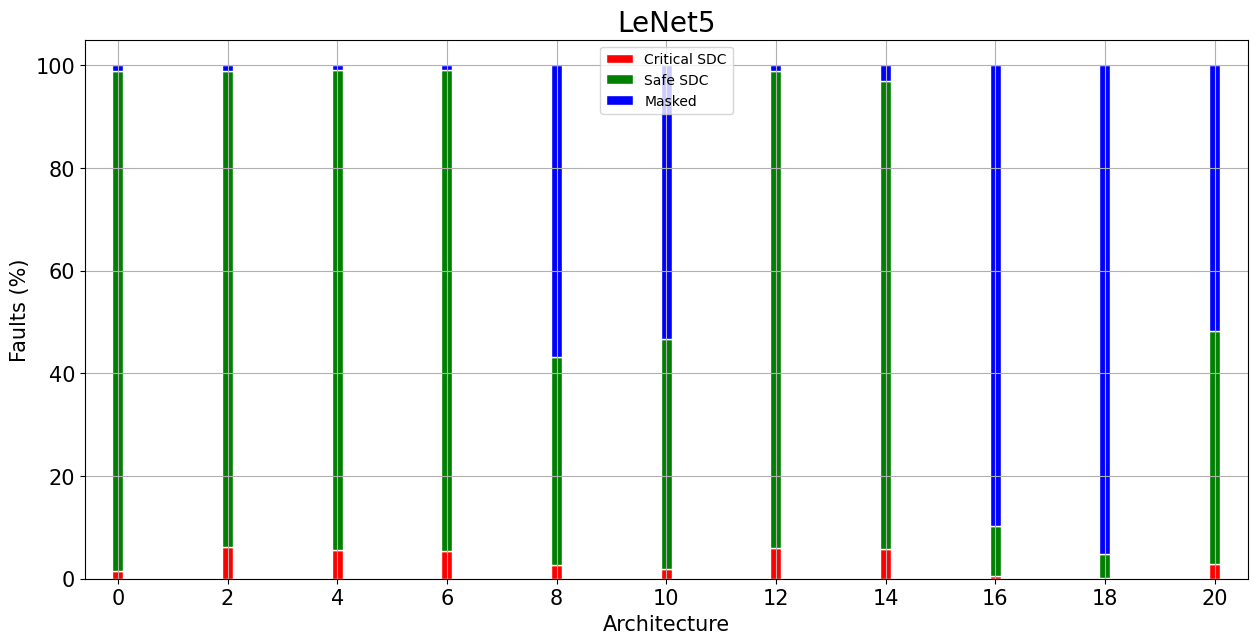

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,7))

general_report.rename(columns={'img_Top1_Crit': 'Critical SDC',
                       'img_Top1_SDC': 'Safe SDC',
                       'img_Top1_Masked': 'Masked'}, inplace=True)

grouped_fd = general_report[general_report['Architecture']=='Swap ReLU6'][['Critical SDC', 'Safe SDC', 'Masked', 'layer']].groupby('layer').mean()
# new_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
# grouped_fd = grouped_fd.reindex(new_order)

grouped_fd.plot(kind='bar', stacked=True, color=['red', 'green', 'blue' ], edgecolor='white', width=0.1, ax = ax, legend=True, rot=0)



ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Faults (%)', fontsize=15)
ax.set_xlabel('Architecture', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Accuracy of the corrupted NN
#### (The accuracy is evaluated considering only the top1 prediction)

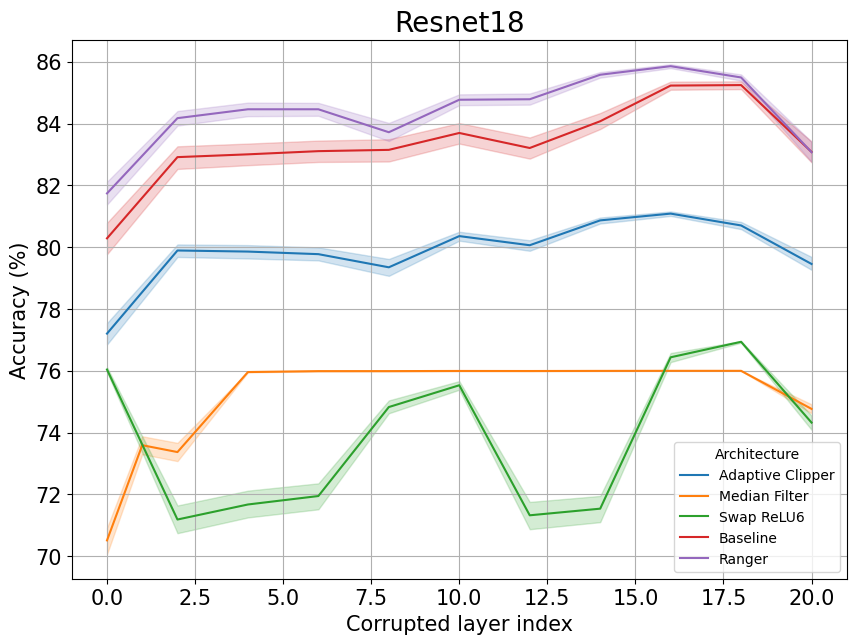

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
# sns.stripplot(data=general_report, x='layer', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=True, alpha=.2)
sns.lineplot(data=general_report, x='layer', y='fault_ACC@1', hue='Architecture', ax = ax, markersize=20, markeredgewidth=3,)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

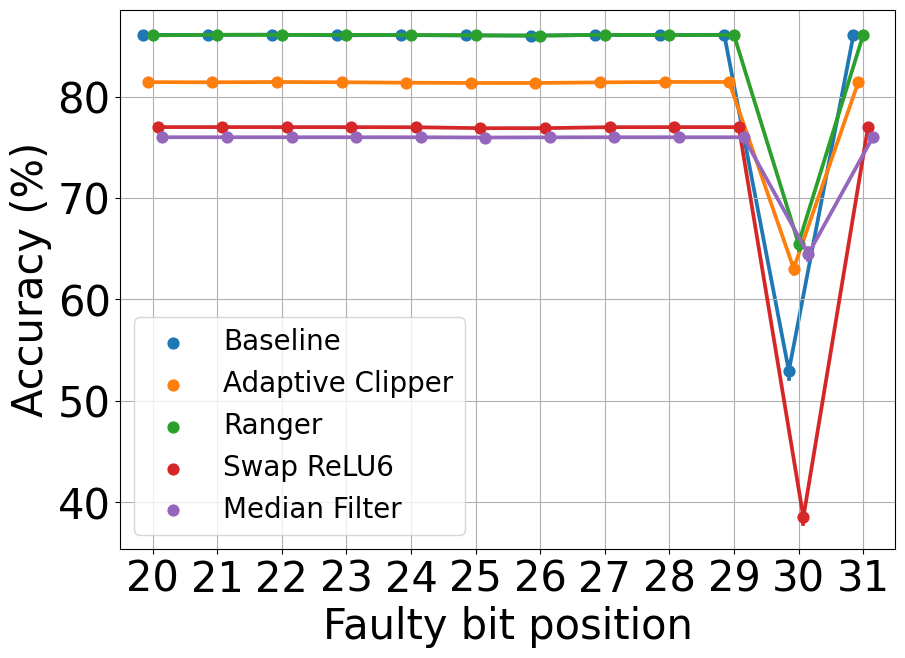

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
legend_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
# sns.stripplot(data=general_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=True, alpha=.2)
sns.pointplot(data=general_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=0.3, linestyle="none", markers="o", markersize=40, 
               legend=False, hue_order=legend_order)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
# ax.set_title('LeNet5', fontsize=20)

ax.grid()
ax.legend(fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=30)
ax.set_xlabel('Faulty bit position', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

### Let's isolate bit 30

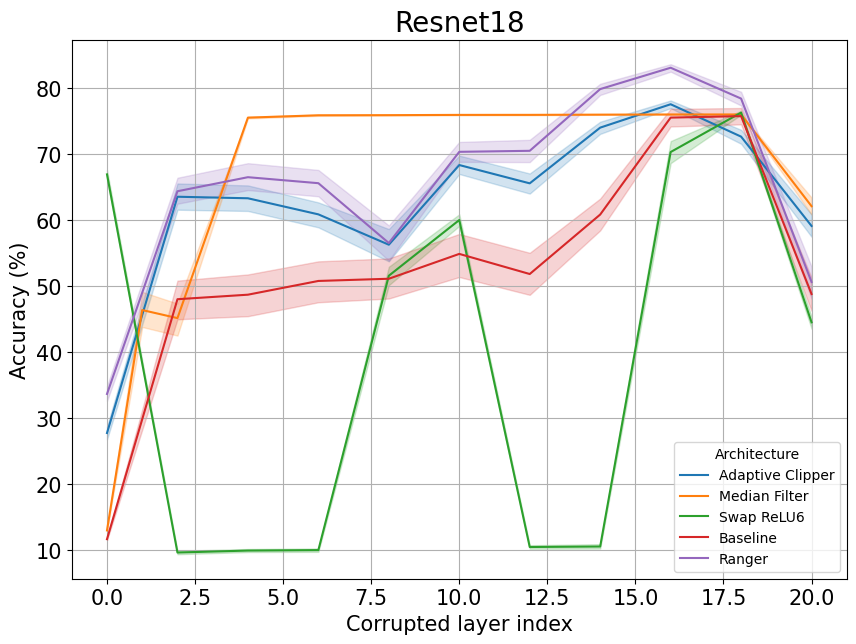

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report[general_report['bit_faulty_pos']==30], x='layer', y='fault_ACC@1', hue='Architecture', ax = ax, markersize=20, markeredgewidth=3,)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## NaN values in NN output

In [7]:
new_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689442 entries, 0 to 1689441
Data columns (total 34 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1682680 non-null  object 
 1   FaultID         1682680 non-null  object 
 2   imID            1682680 non-null  float64
 3   layer           1682680 non-null  float64
 4   kernel          1682680 non-null  float64
 5   channel         1682680 non-null  float64
 6   row             1527180 non-null  float64
 7   col             1527180 non-null  float64
 8   bitmask         1682680 non-null  float64
 9   G_Target        1682680 non-null  float64
 10  F_clas0         1682680 non-null  float64
 11  F_clas1         1682680 non-null  float64
 12  F_clas2         1682680 non-null  float64
 13  F_clas3         1682680 non-null  float64
 14  F_clas4         1682680 non-null  float64
 15  F_pred0         1682656 non-null  float64
 16  F_pred1         1682656 non-null  fl

## Infinite values in NN output

In [10]:
new_report_numeric = new_report.apply(pd.to_numeric, errors='coerce')
infinity_mask = np.isinf(new_report_numeric)
infinity_report = new_report[infinity_mask.any(axis=1)]

ValueError: min() arg is an empty sequence

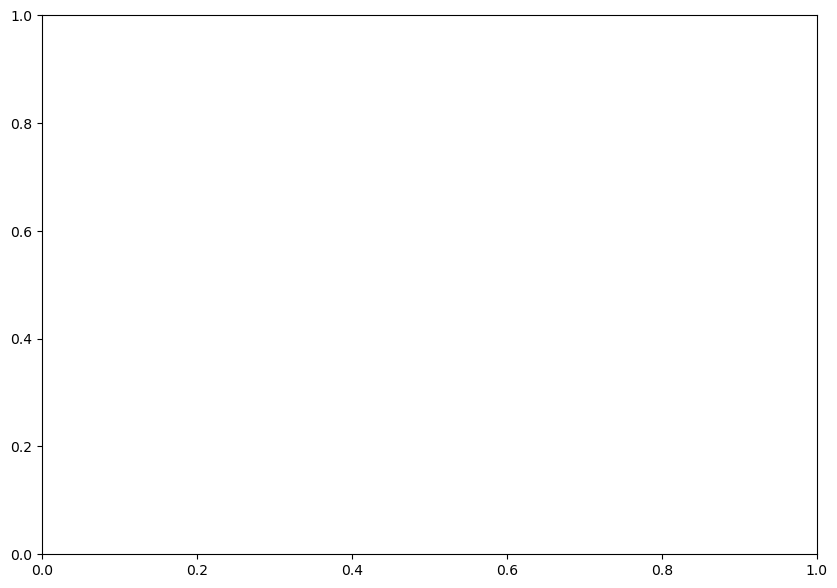

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = infinity_report, x='bit_faulty_pos', hue='Architecture',  ax = ax)

ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Top1 - Top2 
#### It is worth to explore also this metric becuase, when models are deployed into a CPS, if the difference between the top1 and top2 predictions are too close, so if the model is not confident enough on the top1 prediction, it is discarded.
(A reference is needed)
# Here intinite and nan values must be discarded

In [10]:
new_report_numeric = new_report.apply(pd.to_numeric, errors='coerce')
infinity_mask = np.isinf(new_report_numeric)
non_infinity_report = new_report[~infinity_mask.any(axis=1)]

In [11]:
non_infinity_report['top_diff'] = abs(non_infinity_report['F_pred0'] - non_infinity_report['F_pred1'])/abs(non_infinity_report['F_pred0']+non_infinity_report['F_pred1']+non_infinity_report['F_pred2']+non_infinity_report['F_pred3']+non_infinity_report['F_pred4'])

In [12]:
non_infinity_report['top_diff'].describe()

count    1.682656e+06
mean     2.654633e-01
std      2.177151e+01
min      3.773640e-07
25%      5.206194e-02
50%      1.330757e-01
75%      3.041137e-01
max      2.801794e+04
Name: top_diff, dtype: float64

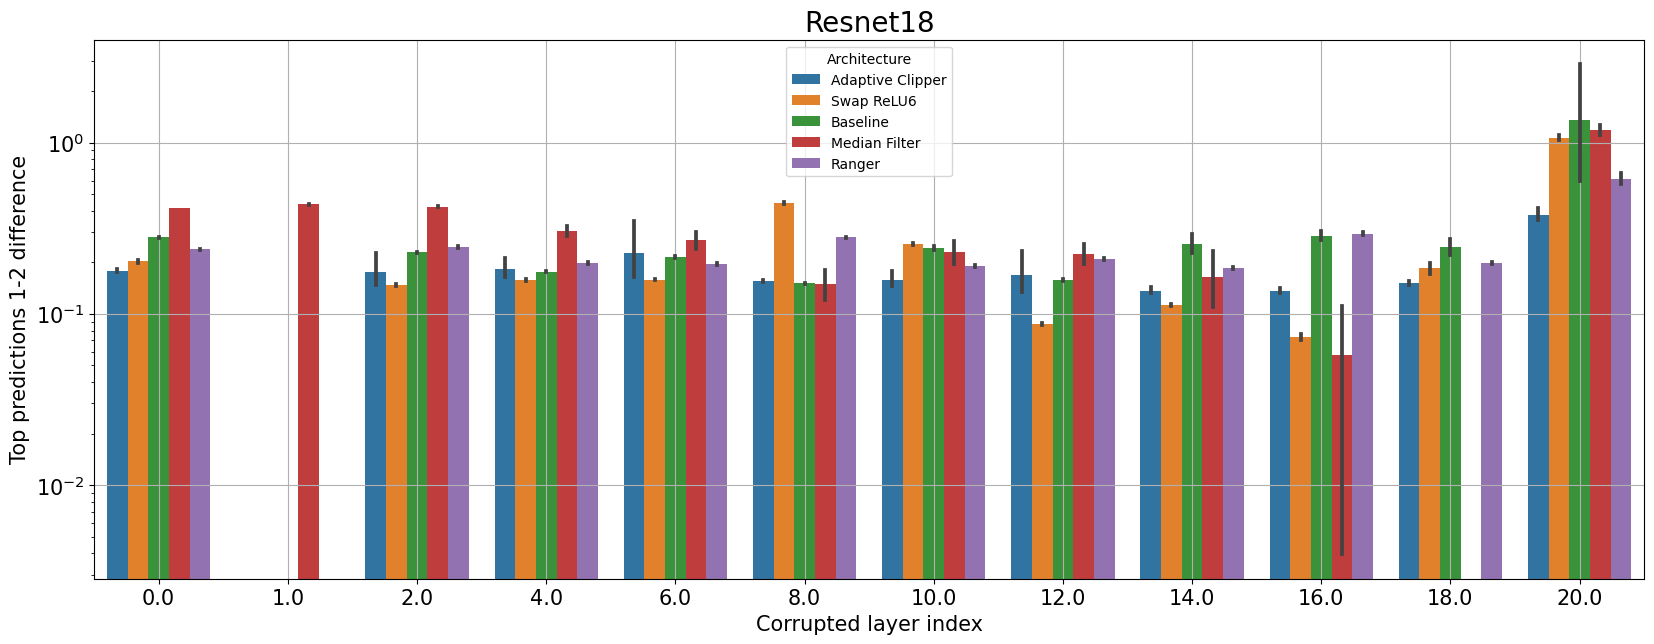

In [14]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=non_infinity_report, x='layer', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Top predictions 1-2 difference', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

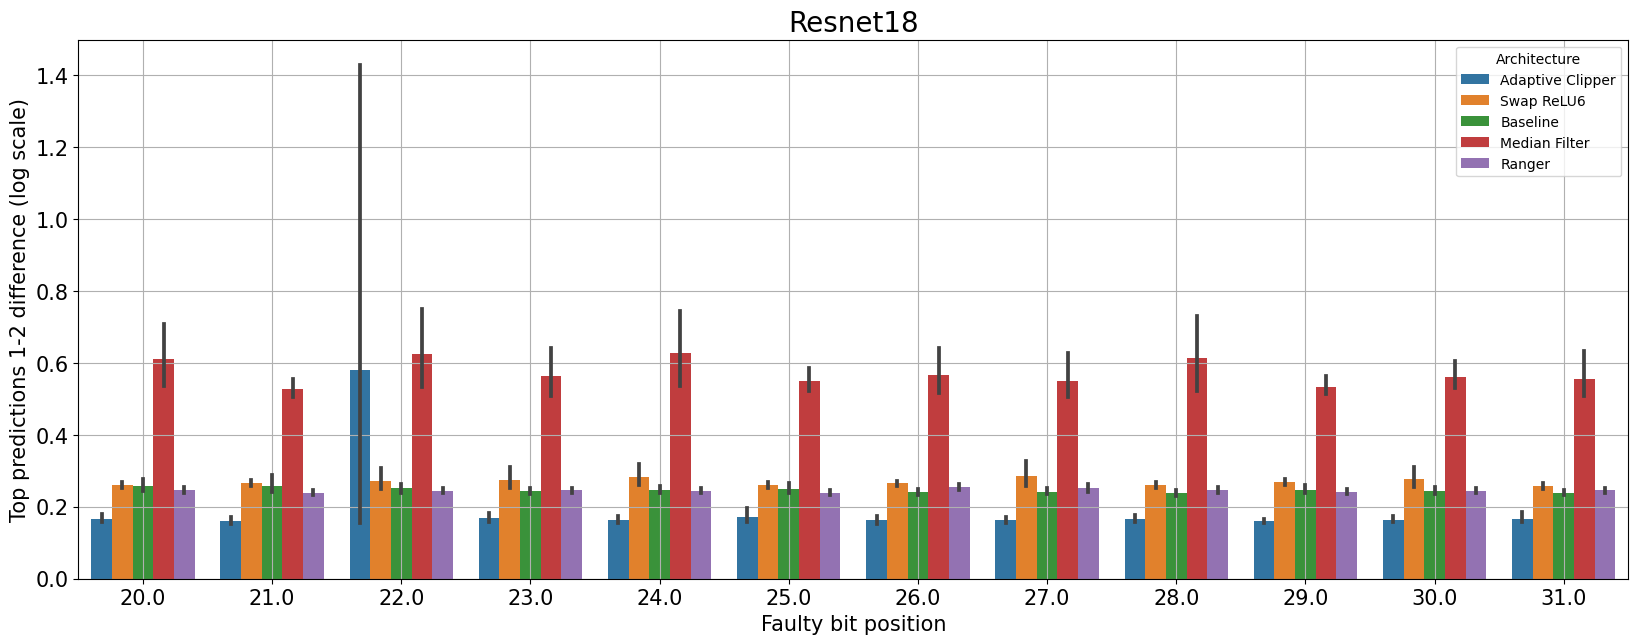

In [11]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=non_infinity_report, x='bit_faulty_pos', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Resnet18', fontsize=20)
ax.grid()
ax.set_ylabel('Top predictions 1-2 difference (log scale)', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Distribution of different calsses occurences 

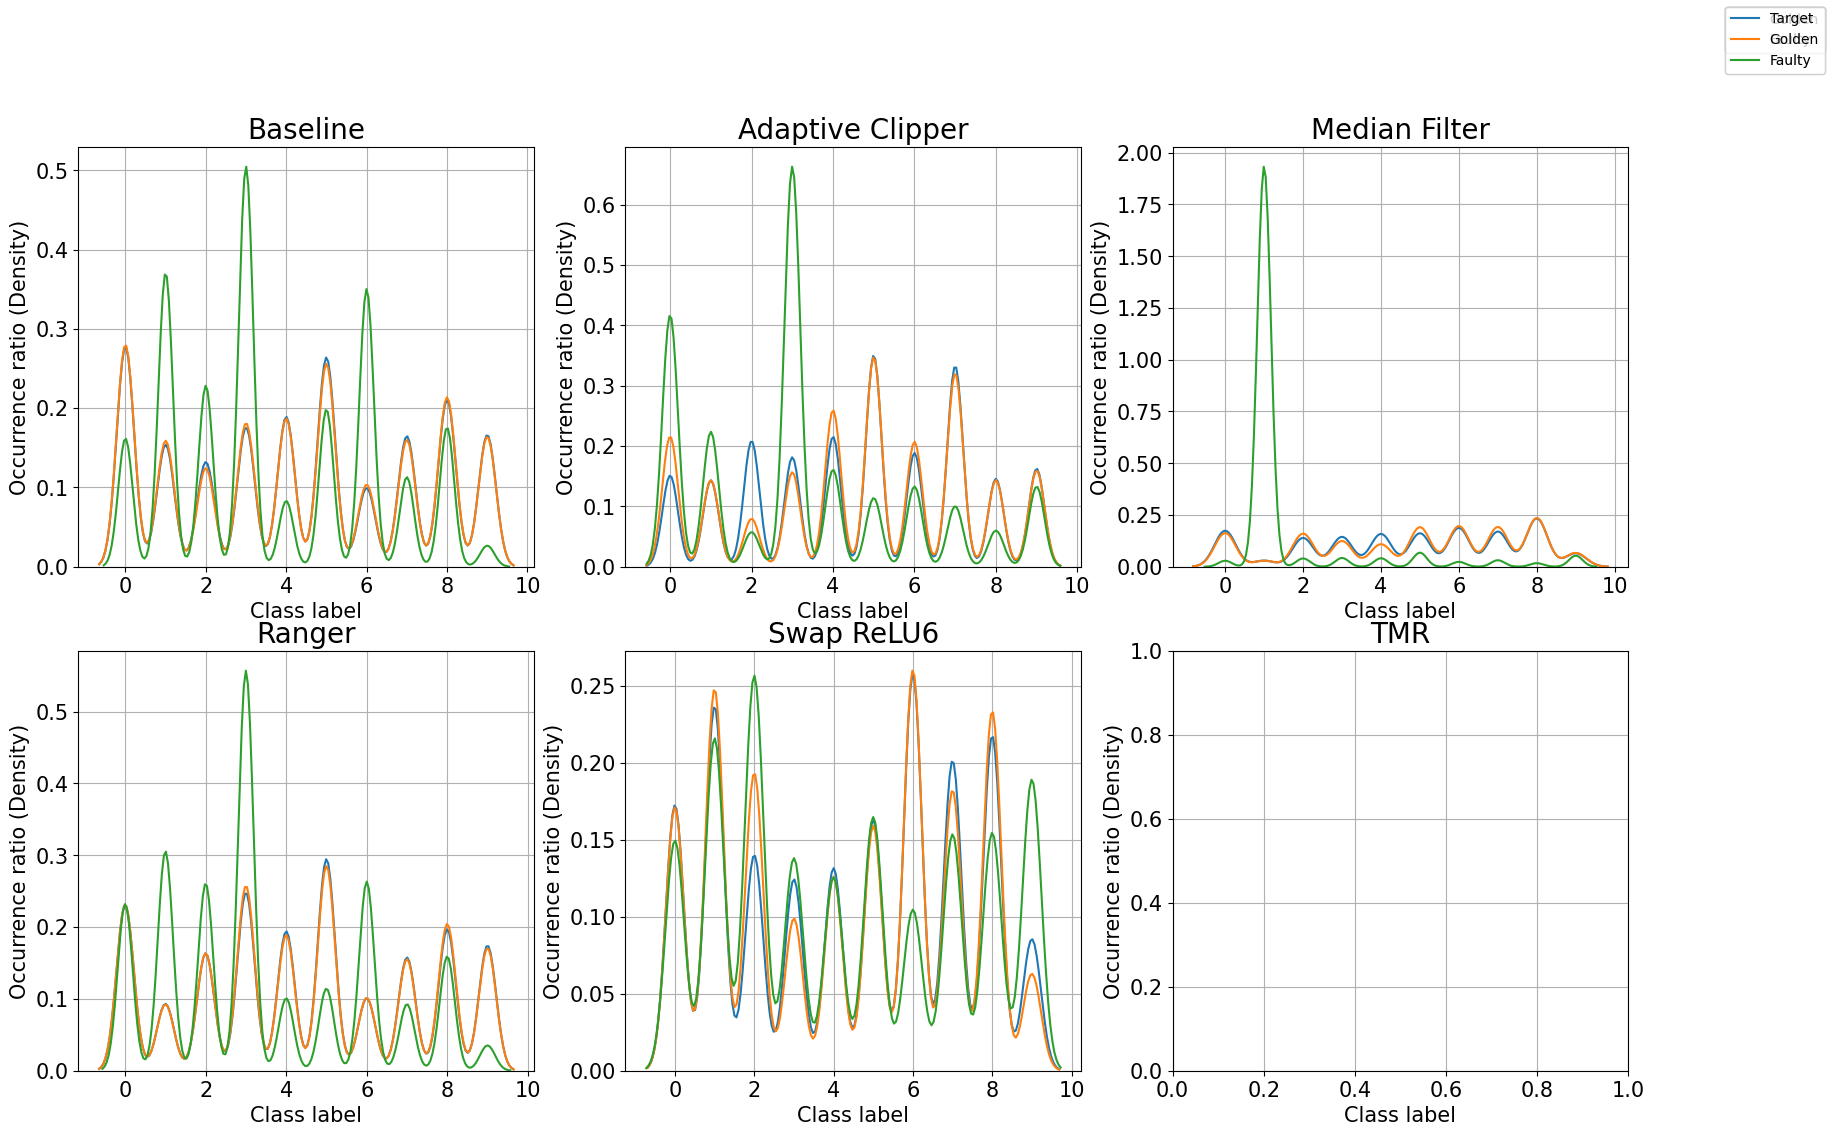

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='G_Target', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='G_clas0', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='F_clas0', ax = ax[0][0], common_norm=True)
ax[0][0].set_title('Baseline', fontsize=20)
ax[0][0].grid()
ax[0][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][0].set_xlabel('Class label', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='G_Target', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='G_clas0', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='F_clas0', ax = ax[0][1], common_norm= True)
ax[0][1].set_title('Adaptive Clipper', fontsize=20)
ax[0][1].grid()
ax[0][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][1].set_xlabel('Class label', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='G_Target', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='G_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='F_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
ax[0][2].set_title('Median Filter', fontsize=20)
ax[0][2].grid()
ax[0][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][2].set_xlabel('Class label', fontsize=15)
ax[0][2].tick_params(axis='x', labelsize=15)
ax[0][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='G_Target', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='G_clas0', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='F_clas0', ax = ax[1][0], common_norm= True)
ax[1][0].set_title('Ranger', fontsize=20)
ax[1][0].grid()
ax[1][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][0].set_xlabel('Class label', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='G_Target', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='G_clas0', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='F_clas0', ax = ax[1][1], common_norm=True)
ax[1][1].set_title('Swap ReLU6', fontsize=20)
ax[1][1].grid()
ax[1][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][1].set_xlabel('Class label', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='G_Target', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='G_clas0', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='F_clas0', ax = ax[1][2], common_norm=True)
ax[1][2].set_title('TMR', fontsize=20)
ax[1][2].grid()
ax[1][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][2].set_xlabel('Class label', fontsize=15)
ax[1][2].tick_params(axis='x', labelsize=15)
ax[1][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

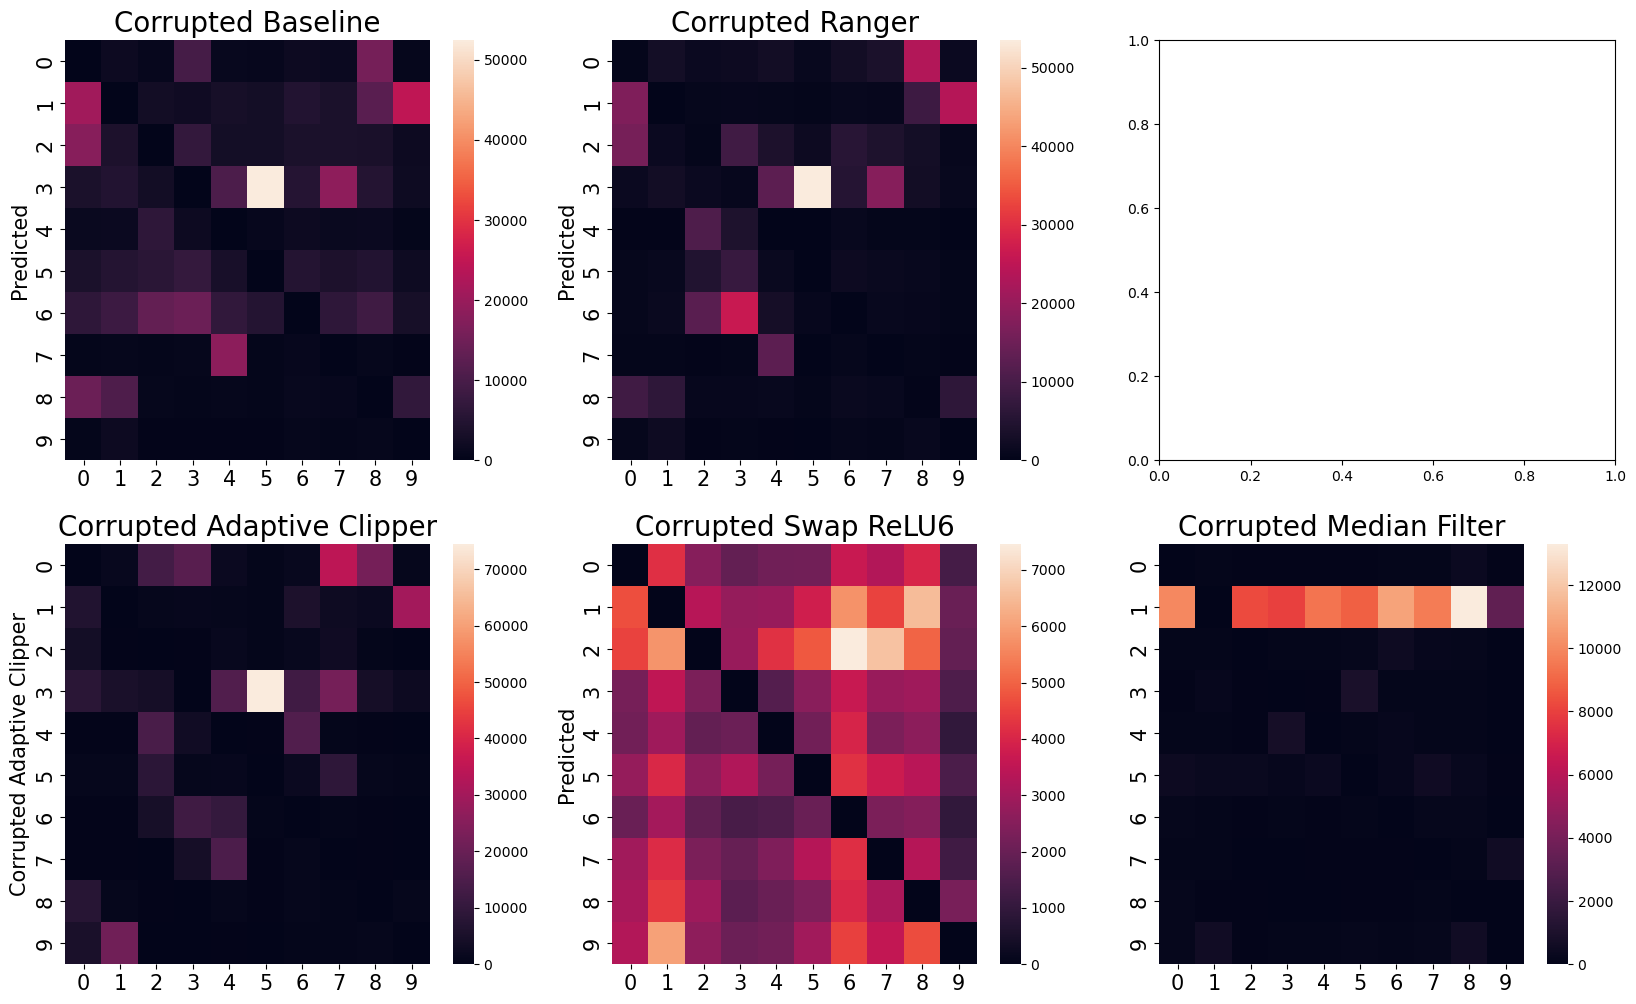

In [18]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(2,3,figsize=(20,12))

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Baseline']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_Target'])
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][0])
ax[0][0].set_title('Corrupted Baseline', fontsize=20)
# ax[0][0].grid()
ax[0][0].set_ylabel('Predicted', fontsize=15)
ax[0][0].set_xlabel('', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_Target'])
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][1])
# ax[0][1].set_title('Golden Baseline', fontsize=20)
# # ax[0][1].grid()
# ax[0][1].set_ylabel('', fontsize=15)
# ax[0][1].set_xlabel('', fontsize=15)
# ax[0][1].tick_params(axis='x', labelsize=15)
# ax[0][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_Target'])
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][0])
ax[1][0].set_title('Corrupted Adaptive Clipper', fontsize=20)
# ax[1][0].grid()
ax[1][0].set_ylabel('Corrupted Adaptive Clipper', fontsize=15)
ax[1][0].set_xlabel('', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_Target'])
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][1])
# ax[1][1].set_title('Golden Adaptive Clipper', fontsize=20)
# # ax[1][1].grid()
# ax[1][1].set_ylabel('', fontsize=15)
# ax[1][1].set_xlabel('', fontsize=15)
# ax[1][1].tick_params(axis='x', labelsize=15)
# ax[1][1].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_clas0'])
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
# ax[2][0].set_title('Median Filter', fontsize=20)
# ax[2][0].grid()
# ax[2][0].set_ylabel('Predicted', fontsize=15)
# ax[2][0].set_xlabel('', fontsize=15)
# ax[2][0].tick_params(axis='x', labelsize=15)
# ax[2][0].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_Target'])
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
# ax[2][1].set_title('Median Filter', fontsize=20)
# ax[2][1].grid()
# ax[2][1].set_ylabel('Predicted', fontsize=15)
# ax[2][1].set_xlabel('', fontsize=15)
# ax[2][1].tick_params(axis='x', labelsize=15)
# ax[2][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Ranger']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_clas0'])
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][1])
ax[0][1].set_title('Corrupted Ranger', fontsize=20)
# ax[3][0].grid()
ax[0][1].set_ylabel('Predicted', fontsize=15)
ax[0][1].set_xlabel('', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_Target'])
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[3][1])
# ax[3][1].set_title('Golden Ranger', fontsize=20)
# # ax[3][1].grid()
# ax[3][1].set_ylabel('', fontsize=15)
# ax[3][1].set_xlabel('', fontsize=15)
# ax[3][1].tick_params(axis='x', labelsize=15)
# ax[3][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['G_Target'])
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][1])
ax[1][1].set_title('Corrupted Swap ReLU6', fontsize=20)
# ax[4][0].grid()
ax[1][1].set_ylabel('Predicted', fontsize=15)
ax[1][1].set_xlabel('', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_Target'])
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][2])
ax[1][2].set_title('Corrupted Median Filter', fontsize=20)
# ax[4][1].grid()
ax[1][2].set_ylabel('', fontsize=15)
ax[1][2].set_xlabel('', fontsize=15)
ax[1][2].tick_params(axis='x', labelsize=15)
ax[1][2].tick_params(axis='y', labelsize=15)
